In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-and-health-impact-dataset/air_quality_health_impact_data.csv


In [3]:
df = pd.read_csv('/kaggle/input/air-quality-and-health-impact-dataset/air_quality_health_impact_data.csv')
pd.set_option('max_colwidth', 100)
df.head(5)

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

In [5]:
# Özellikler (X) ve hedef değişken (y)

X = df.drop('HealthImpactClass', axis=1)
y = df['HealthImpactClass']

In [6]:
# Özellikleri ölçeklendirme (standardizasyon)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=58)

In [9]:
# Decision Tree modelini oluşturma

dt_model = DecisionTreeClassifier(random_state=58)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=58)

In [10]:
# Test seti üzerinde tahmin yapma
y_pred = dt_model.predict(X_test)

In [11]:
# Model başarısını değerlendirme

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [12]:
# Confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[961   2   1   1   1]
 [  2 103   1   2   3]
 [  4   1  47   2   2]
 [  2   1   1   9   1]
 [  4   2   5   1   4]]


In [13]:
# Classification report

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       966
         1.0       0.94      0.93      0.94       111
         2.0       0.85      0.84      0.85        56
         3.0       0.60      0.64      0.62        14
         4.0       0.36      0.25      0.30        16

    accuracy                           0.97      1163
   macro avg       0.75      0.73      0.74      1163
weighted avg       0.96      0.97      0.97      1163



In [14]:
# Öğrenme eğrisini hesaplama
train_sizes, train_scores, test_scores = learning_curve(
    dt_model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

In [15]:
# Eğitim ve test hatalarını hesaplama
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

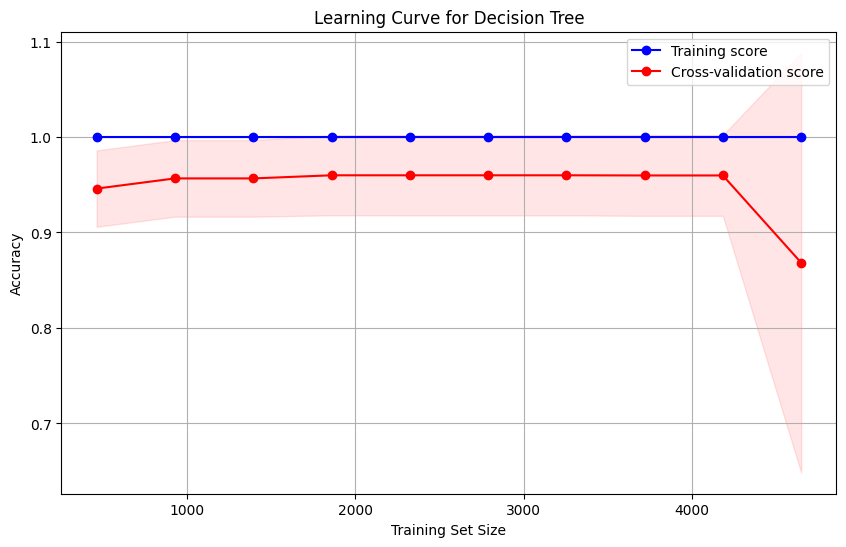

In [16]:
# Öğrenme eğrisini çizme
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-validation score')

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.1)

plt.title('Learning Curve for Decision Tree')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

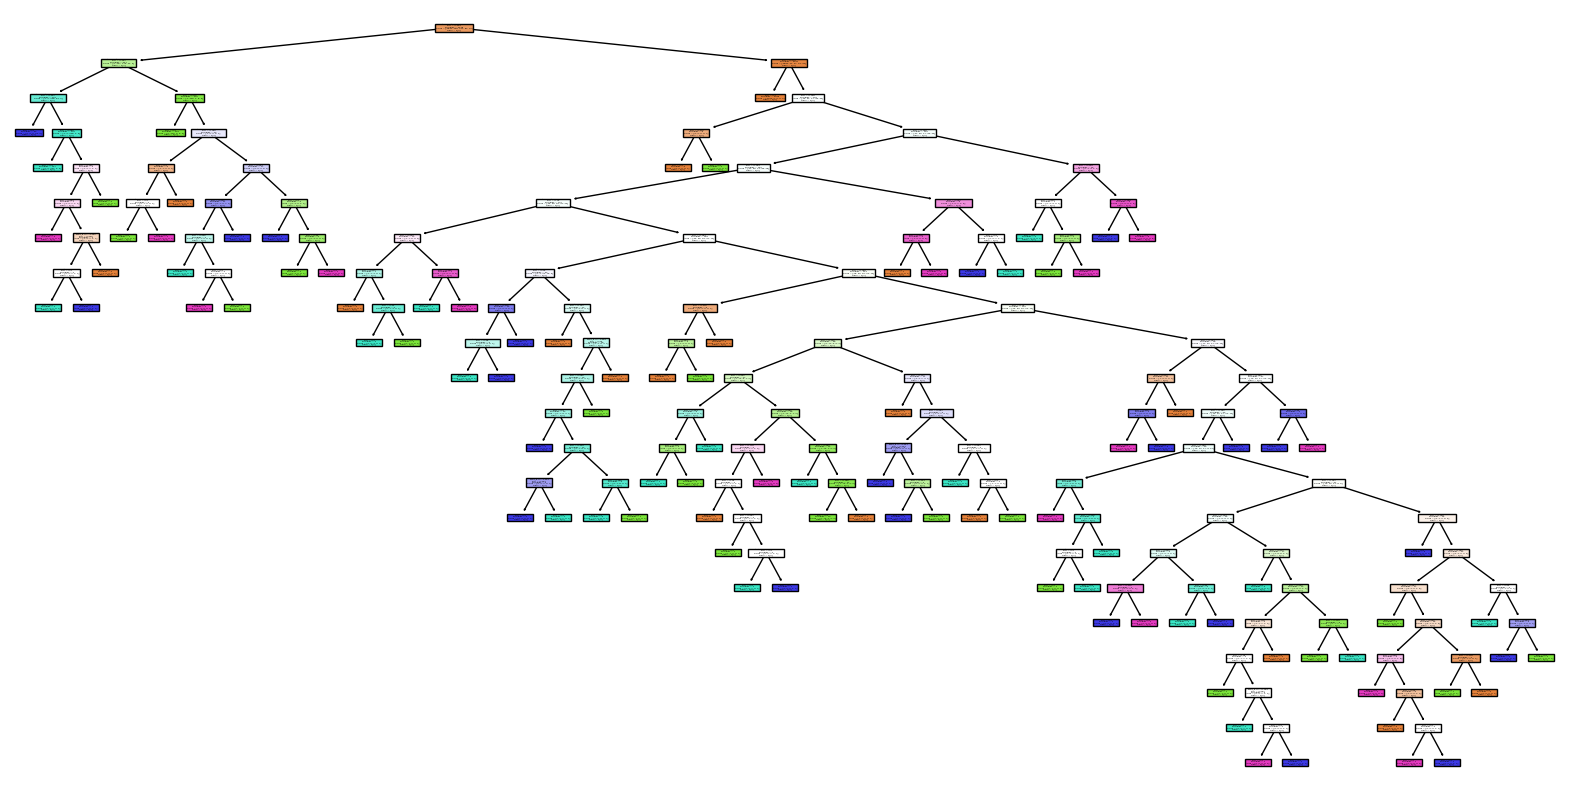

In [17]:
# Ağacı çizdirme

plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=df.columns[:-1], class_names=True)
plt.show()